In [1]:
function_path="analyses/jennifer/notebooks/functions.R"
wd_path="/projects/CARDIPS/analysis/epigenome_resource"
setwd(wd_path)
source(function_path)

theme_bw2 = theme_bw() +
    theme(
        axis.text = element_text(size = 12),
        strip.text = element_text(size = 12),
        axis.title = element_text(size = 12),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 12),
        legend.position = "top"
    )

### load source data 

a_data = fread("~/projects/Resource/iPSCORE_Multi-QTL_Resource/SourceData/SOURCEDATA.FIGURE6A.txt",sep="\t",data.table=F)
b_data= fread("~/projects/Resource/iPSCORE_Multi-QTL_Resource/SourceData/SOURCEDATA.FIGURE6B.txt",sep="\t",data.table=F)

ppc122_man = fread("~/projects/Resource/iPSCORE_Multi-QTL_Resource/SourceData/SOURCEDATA.FIGURE6E.txt",sep="\t",data.table=F)




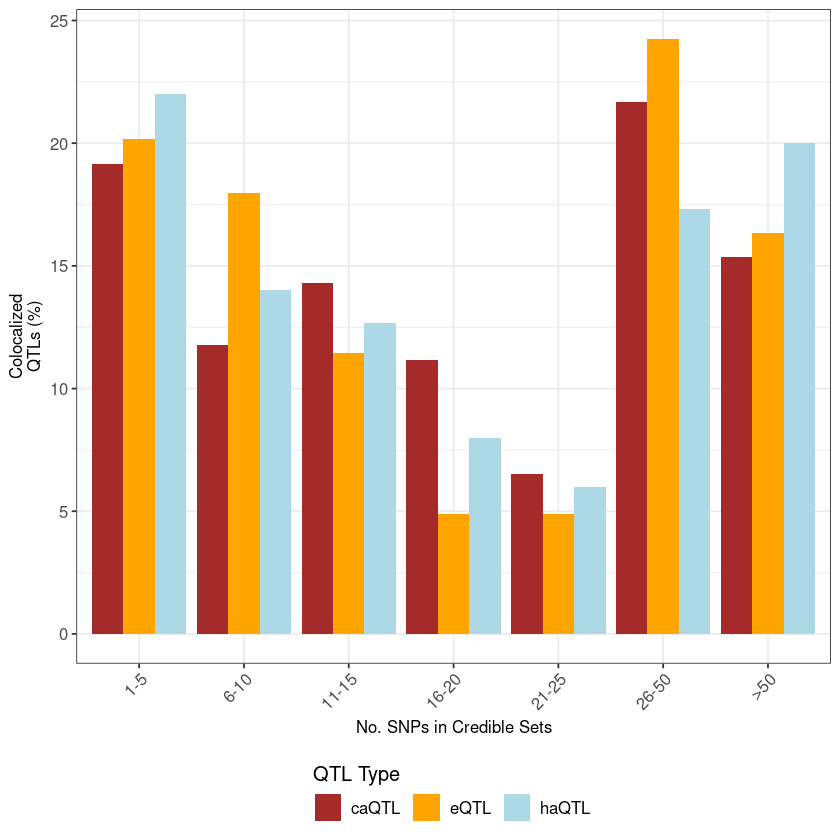

In [2]:
a_data$Bin = factor(a_data$Var2, levels = c("1-5","6-10","11-15","16-20","21-25","26-50",">50"))
a_data$`QTL Type` = a_data$type
a_data$Percent = a_data$Fraction*100
a = ggplot(a_data, aes(Bin, Percent, fill=`QTL Type`)) + theme_bw2 + 
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),axis.title = element_text(size=10),
             legend.position = "bottom" , axis.text = element_text(size=10)) + 
        xlab("No. SNPs in Credible Sets") + ylab("Colocalized\nQTLs (%)") +
        geom_bar(stat="identity", position="dodge") + 
        scale_fill_manual(values= c("brown","orange","lightBlue")) + theme(legend.title.position = "top",
                                                      legend.text=element_text(size=10))
a

In [3]:
b_data$Tissue = factor(b_data$Tissue, levels = rev(c("iPSC","CVPC","PPC")))

b = ggplot(b_data, aes( Freq, reorder(Trait,Freq),fill =Tissue)) + theme_bw2 + 
        theme(axis.text = element_text(size=10),axis.title = element_text(size=10),
             legend.position = "none") +
        xlab("No. QTL-GWAS\nColocalizations") + ylab("") +
        geom_bar(stat="identity", position = "dodge") +
        scale_fill_manual(values = rev(c("lightBlue","red","yellow"))) +
        guides(fill = guide_legend(reverse=T)) + theme(legend.title.position = "top",legend.text=element_text(size=8))



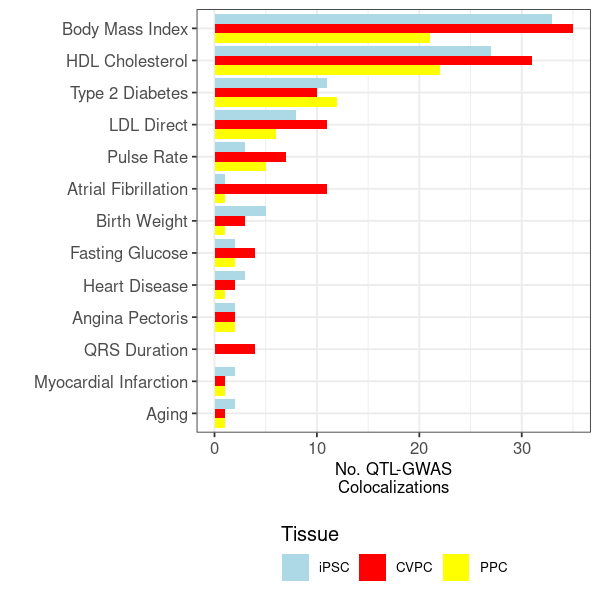

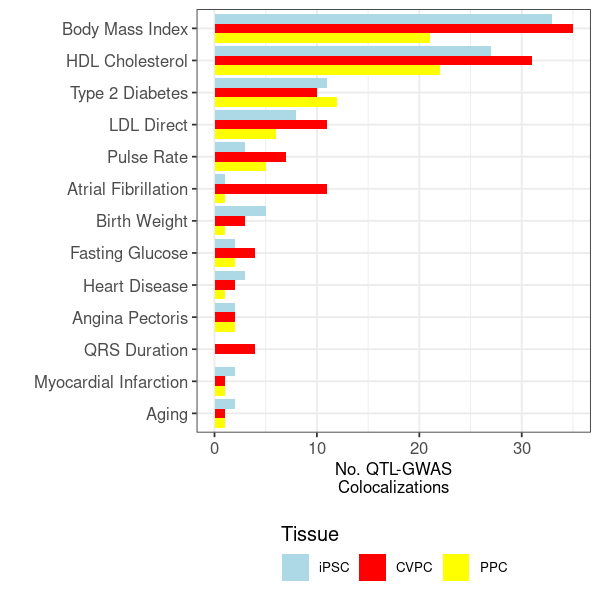

In [4]:
mock_b = ggplot(b_data, aes( Freq, reorder(Trait,Freq),fill =Tissue)) + theme_bw2 + 
        theme(axis.text = element_text(size=10),axis.title = element_text(size=10)) +
#              legend.position = "bottom") +
        xlab("No. QTL-GWAS\nColocalizations") + ylab("") +
        geom_bar(stat="identity", position = "dodge") +
        scale_fill_manual(values = rev(c("lightBlue","red","yellow"))) +
        guides(fill = guide_legend(reverse=T)) + theme(legend.title.position = "top",legend.position = "bottom",
                                                       legend.text=element_text(size=8))
psize(5,5)
mock_b
# png("~/projects/Resource/notebooks/toGitHub/figures/figure6b_leg.png",res=300,units="in",height=5,width=5)
mock_b
# dev.off()

[1] "darkblue" "#94cdd5"  "orange"   "green"    "red"

Warning message:
“Removed 8785 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 8785 rows containing missing values or values outside the scale range
(`geom_point()`).”


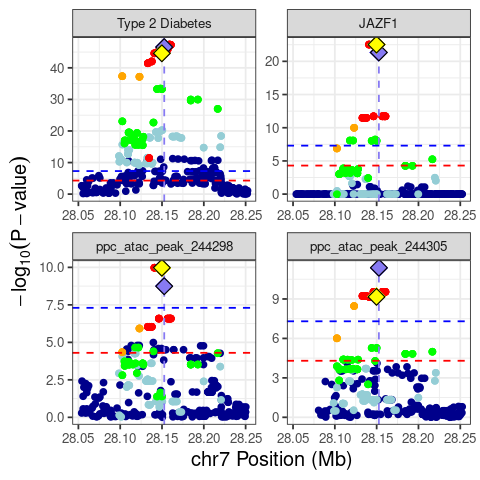

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


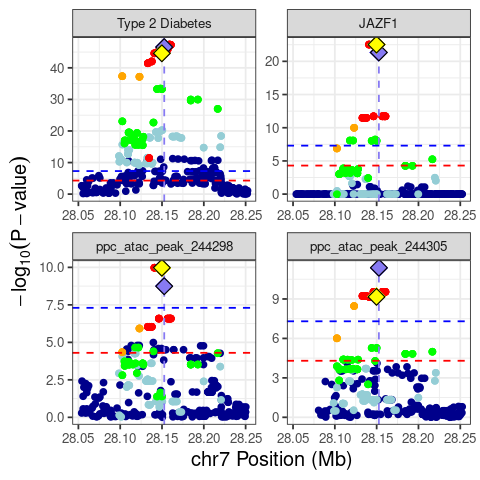

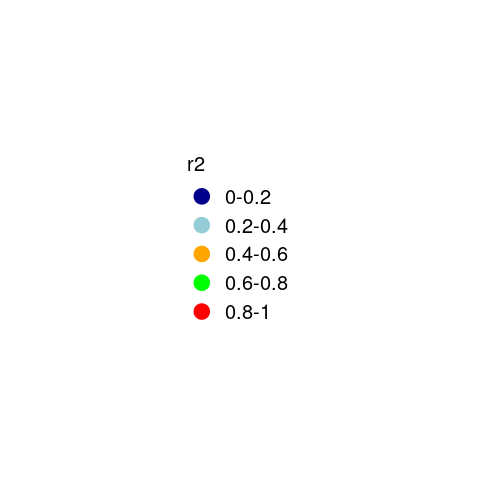

In [5]:
psize(4,5)
cols = unique(ppc122_man$color)
cols = cols[ !is.na(cols)]
cols


psize(4,4)
topsnp_pos = 28152661
x_start = 28.152661 - .1
x_end = 28.152661 + .1
ppc122_man$gene_name = ifelse( grepl("^EN",ppc122_man$element_id), "JAZF1", ppc122_man$element_id)
ppc122_man$gene_name = factor(ppc122_man$gene_name, levels = c("Type 2 Diabetes","JAZF1","ppc_atac_peak_244298","ppc_atac_peak_244305"))

ppc122_plot = ggplot(ppc122_man, aes(x = pos/1e6, y = -log10(pval), color = color)) + 
    geom_point() + theme_bw2 + 
    facet_wrap(.~gene_name, ncol = 2, scales = "free") +
    theme(strip.text = element_text(size= 8),
         axis.text = element_text(size= 8)) + xlab("chr7 Position (Mb)") + ylab(bquote(-log[10](P-value)))+
    geom_point(data = ppc122_man %>% filter(R2 >= 0.2)) + 
    geom_point(data = ppc122_man %>% filter(R2 >= 0.4)) + 
    geom_point(data = ppc122_man %>% filter(R2 >= 0.6)) + 
    geom_point(data = ppc122_man %>% filter(R2 >= 0.8)) +
    scale_color_identity()  +
    geom_vline(xintercept = topsnp_pos/1e6, linetype = "dashed", color = "#877af3")  + 
    geom_hline(data = ppc122_man, aes(yintercept = -log10(5e-5)), linetype = "dashed", color = "red") + 
    geom_hline(data = ppc122_man, aes(yintercept = -log10(5e-8)), linetype = "dashed", color = "blue") +
    geom_point(data = ppc122_man %>% filter(pos == topsnp_pos), color = "#877af3", size = 5, shape = 18) + 
    geom_point(data = ppc122_man %>% filter(pos == topsnp_pos), color = "black", size = 3, shape = 5) + 

    geom_point(data = ppc122_man %>% filter(pos == 28149792), color = "yellow", size = 5, shape = 18) + 
    geom_point(data = ppc122_man %>% filter(pos == 28149792), color = "black", size = 3, shape = 5) + 
    xlim(c(x_start,x_end)) 

ppc122_plot

ppc_legend = ggplot(ppc122_man[ complete.cases(ppc122_man),], aes(x = pos/1e6, y = -log10(pval), color = color)) + geom_point() + jn_classic  +
    facet_wrap(.~element_id, ncol = 3)  + 
    theme(
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 12)
    ) + 
    scale_color_manual(values = cols, labels = c("0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"), name = "r2") + 
    guides(color = guide_legend(override.aes = list(size = 4)))
ppc122_plot
plot_grid(get_legend(ppc_legend))

In [33]:
psize(7,5)
png("~/projects/Resource/notebooks/toGitHub/figures/figure6_v6.png",res=300,units="in",height=5,width=7)
plot_grid(plot_grid(a,b,nrow=2,rel_heights = c(2,2)),plot_grid(ppc122_plot,NULL,nrow=2,rel_heights = c(3,1)),nrow=1,rel_widths = c(1,1.5))
dev.off()

Warning message:
“Removed 8785 rows containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2